In [3]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import torchDatasets as ds
import networks as custNN

sns.set_theme(style='whitegrid')

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams['figure.dpi']= 300

import torch
import torch.nn as nn
from torchvision.transforms import v2


# Device configuration
device = 'cpu' #torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# def manualSeed(seed:int):
#     torch.manual_seed(seed)
#     torch.cuda.manual_seed(seed)
#     torch.cuda.manual_seed_all(seed)
#     torch.backends.cudnn.deterministic = True
#     torch.backends.cudnn.benchmark = False
side = 30
base_dir = '/home/shashank/Code/gonihedric/'; data_dir = base_dir + "data/"; date= "2025-06-19_08-40-39";

In [11]:
transform = v2.Compose([
    v2.Lambda(lambda x: 2*x - 1)
])
smallset = ds.CustomAutoencoderDataset(data_dir+"small", side, transform)
trainset = ds.CustomAutoencoderDataset(data_dir+"train", side, transform)
tinyset = ds.CustomAutoencoderDataset(data_dir+"tiny", side, transform)
testset = ds.CustomAutoencoderDataset(data_dir+"test", side, transform)

print("Length of smallset: ", len(smallset))
print("Length of trainset: ", len(trainset))
print("Length of tinyset: ", len(tinyset))
print("Length of testset: ", len(testset))


Length of smallset:  1400
Length of trainset:  10000
Length of tinyset:  400
Length of testset:  5000


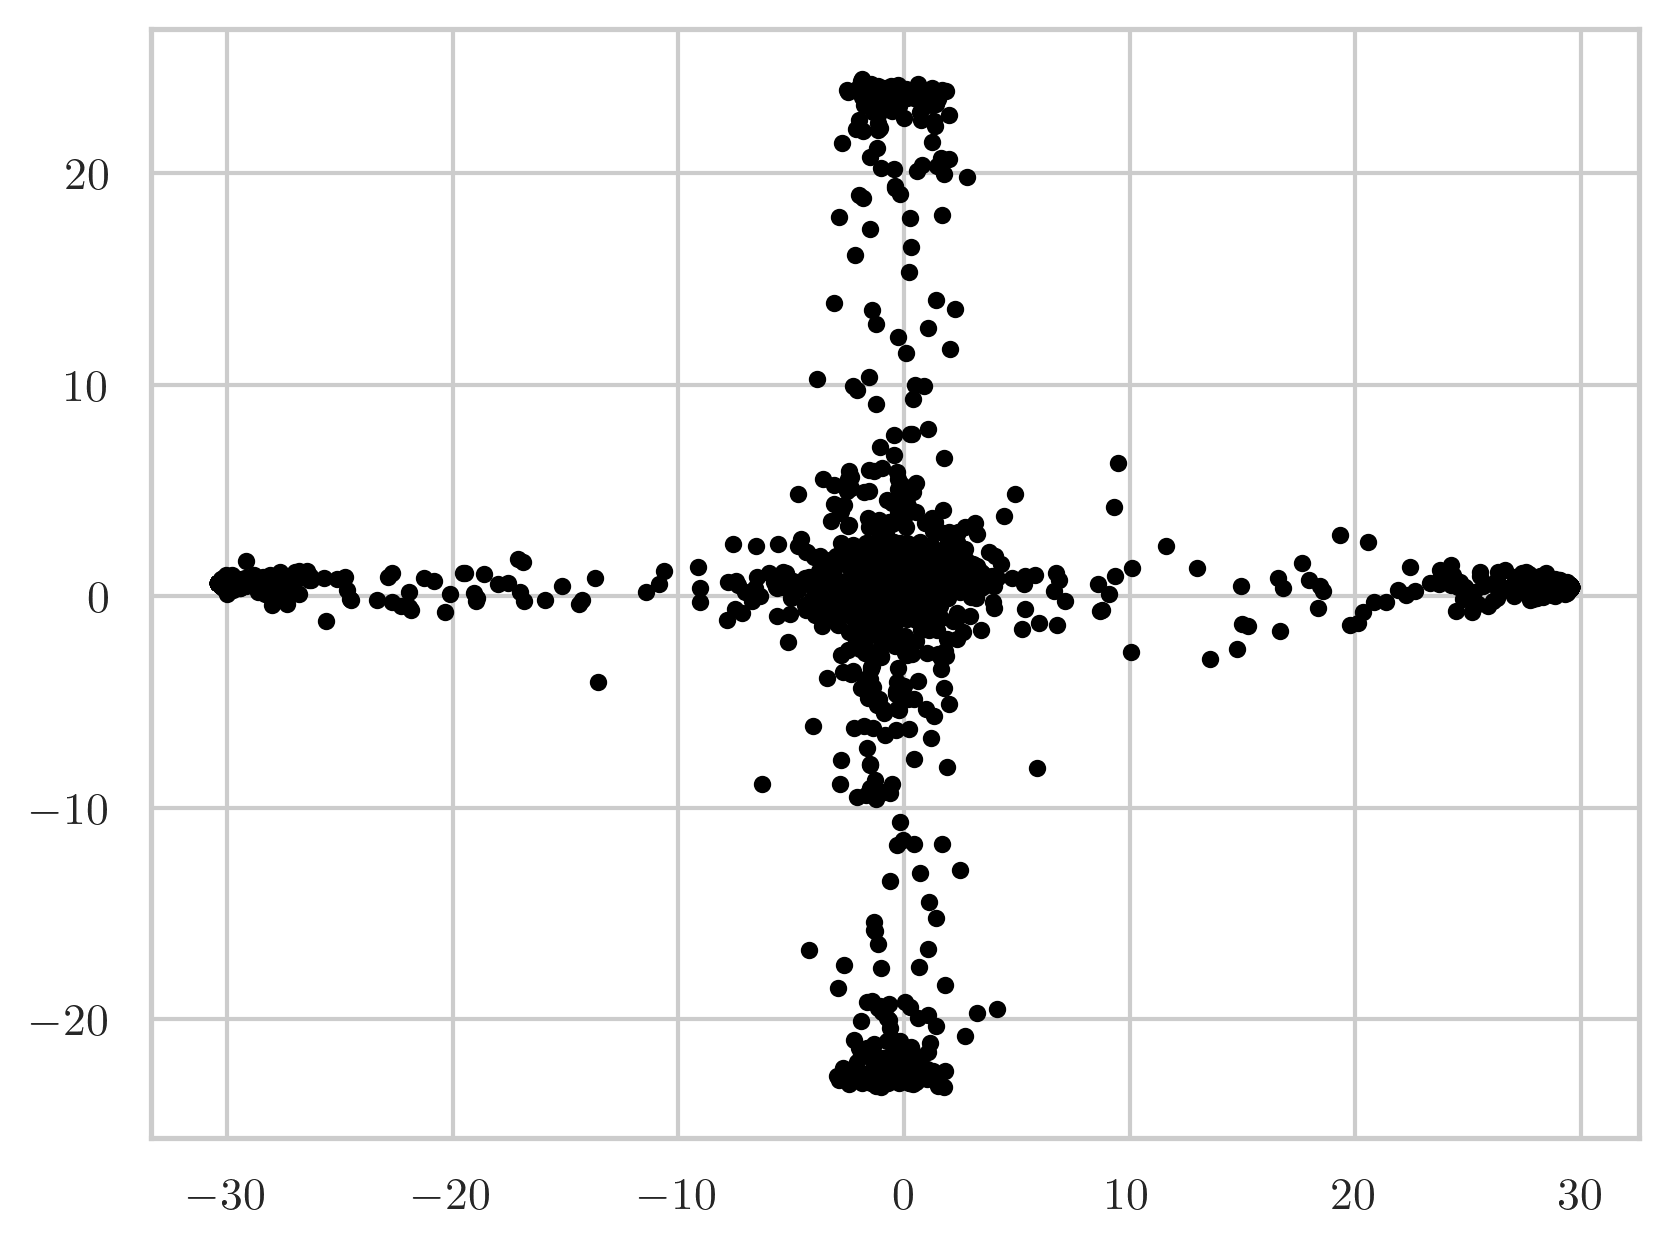

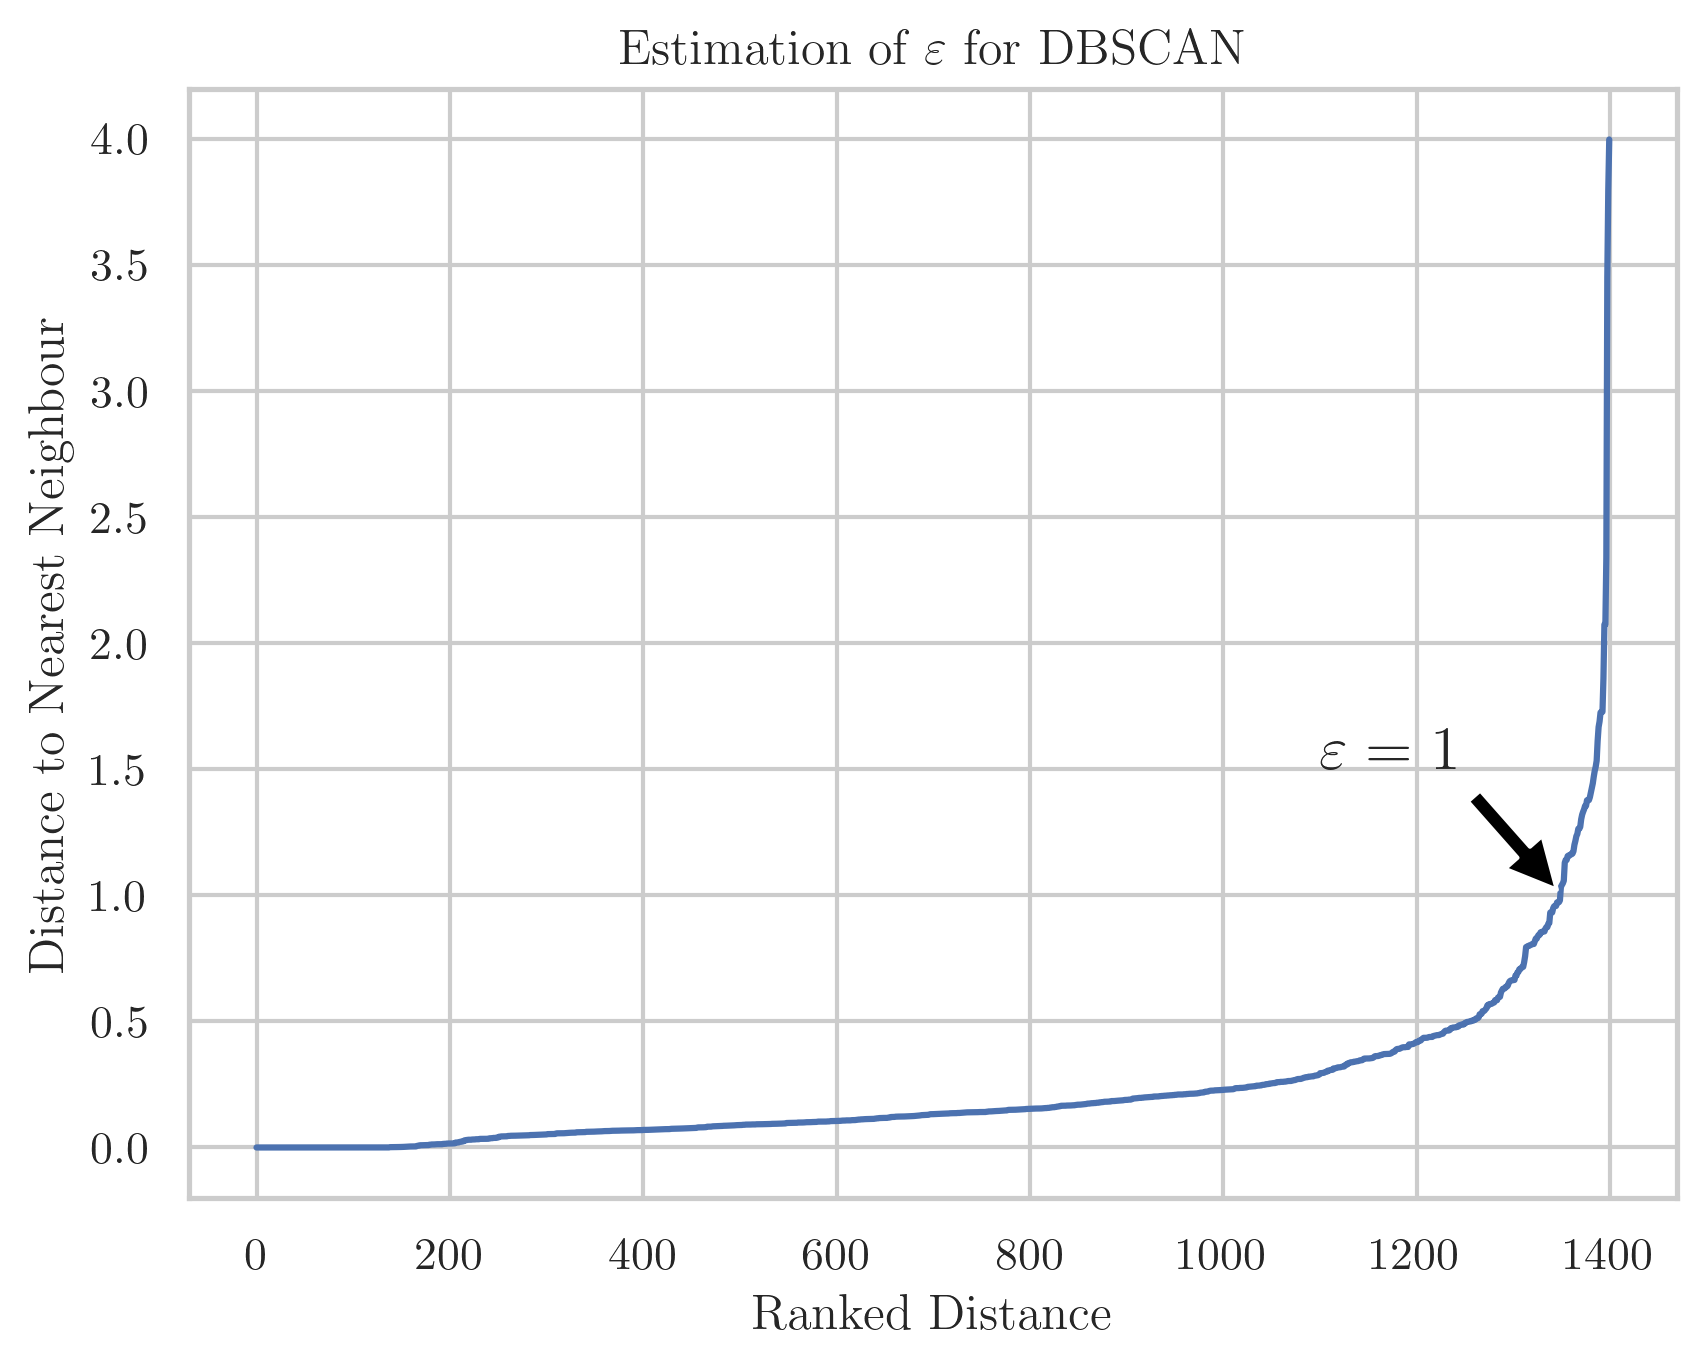

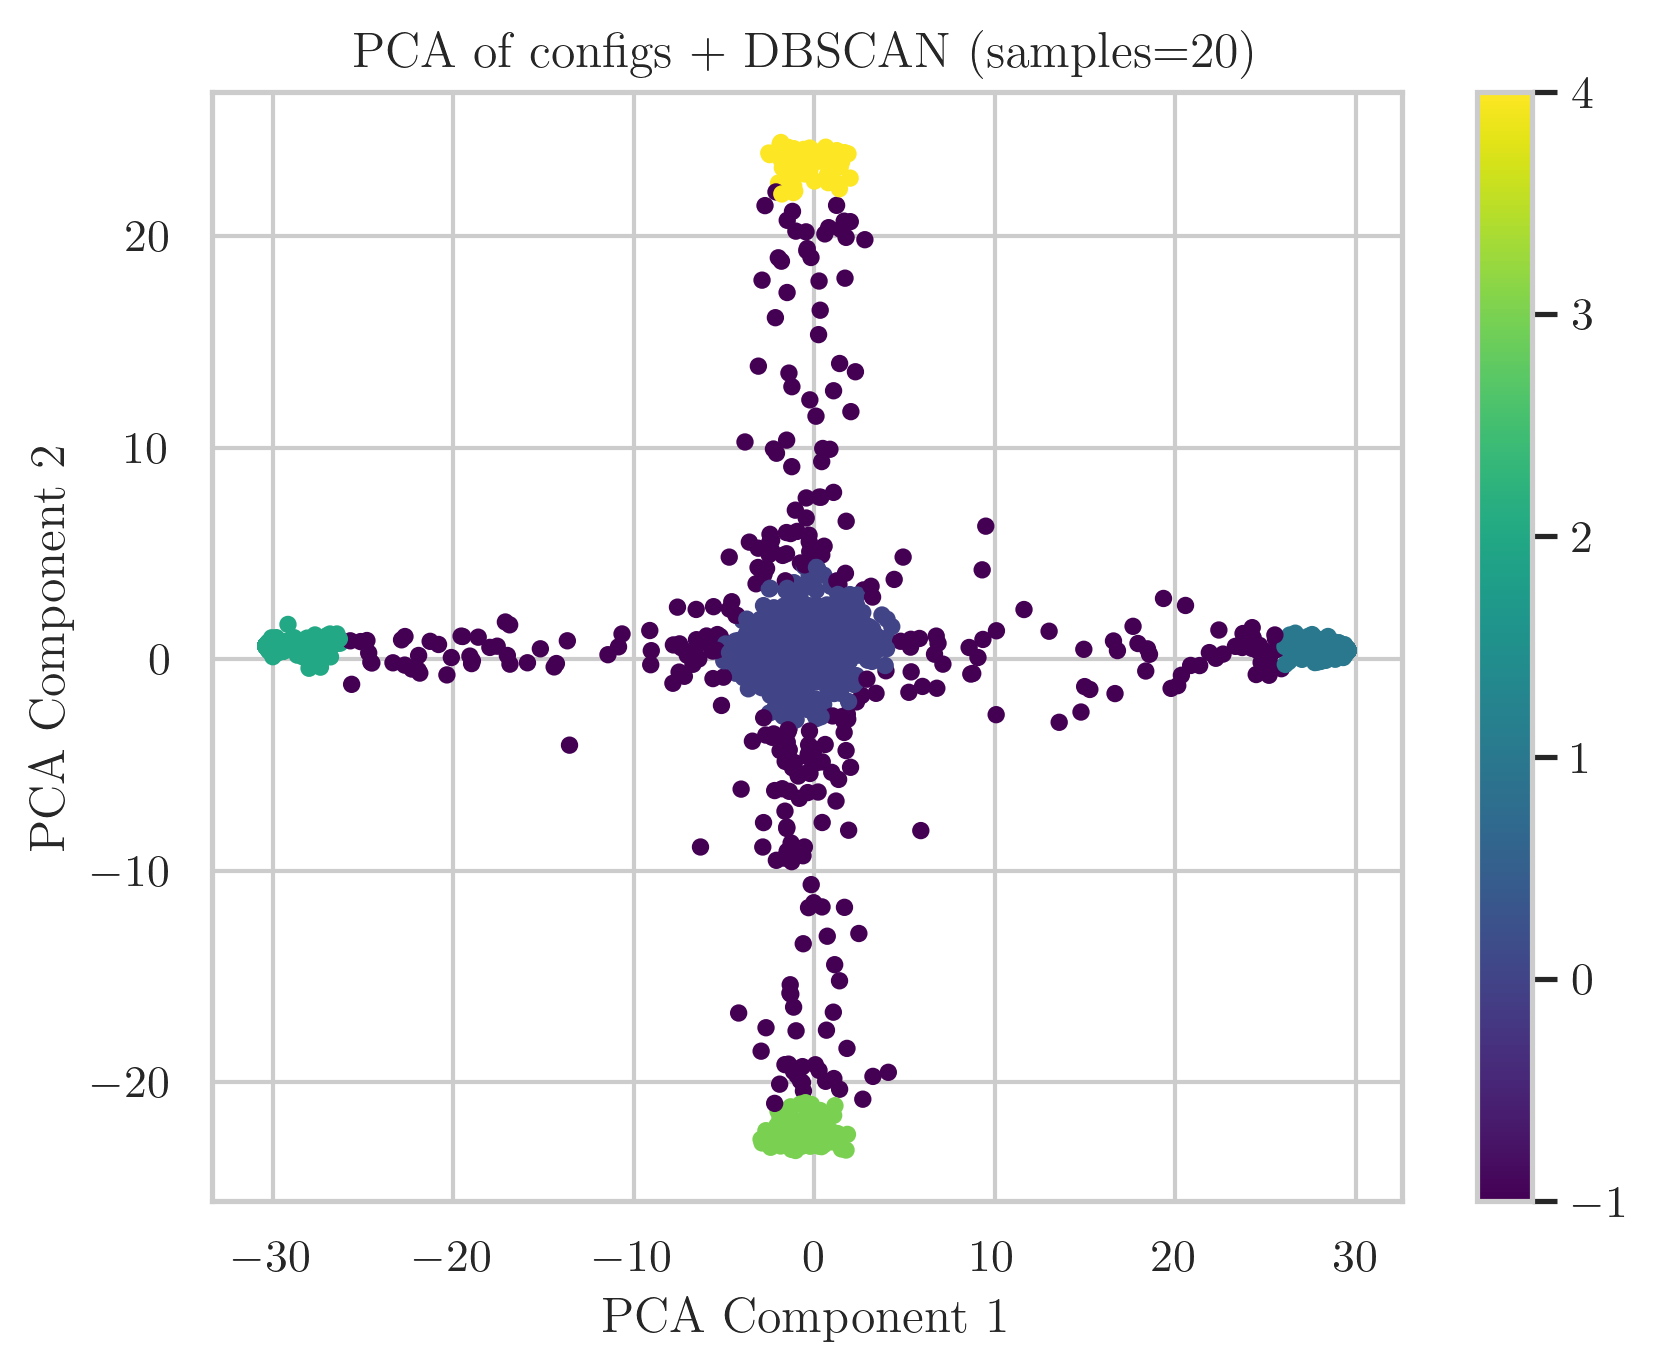

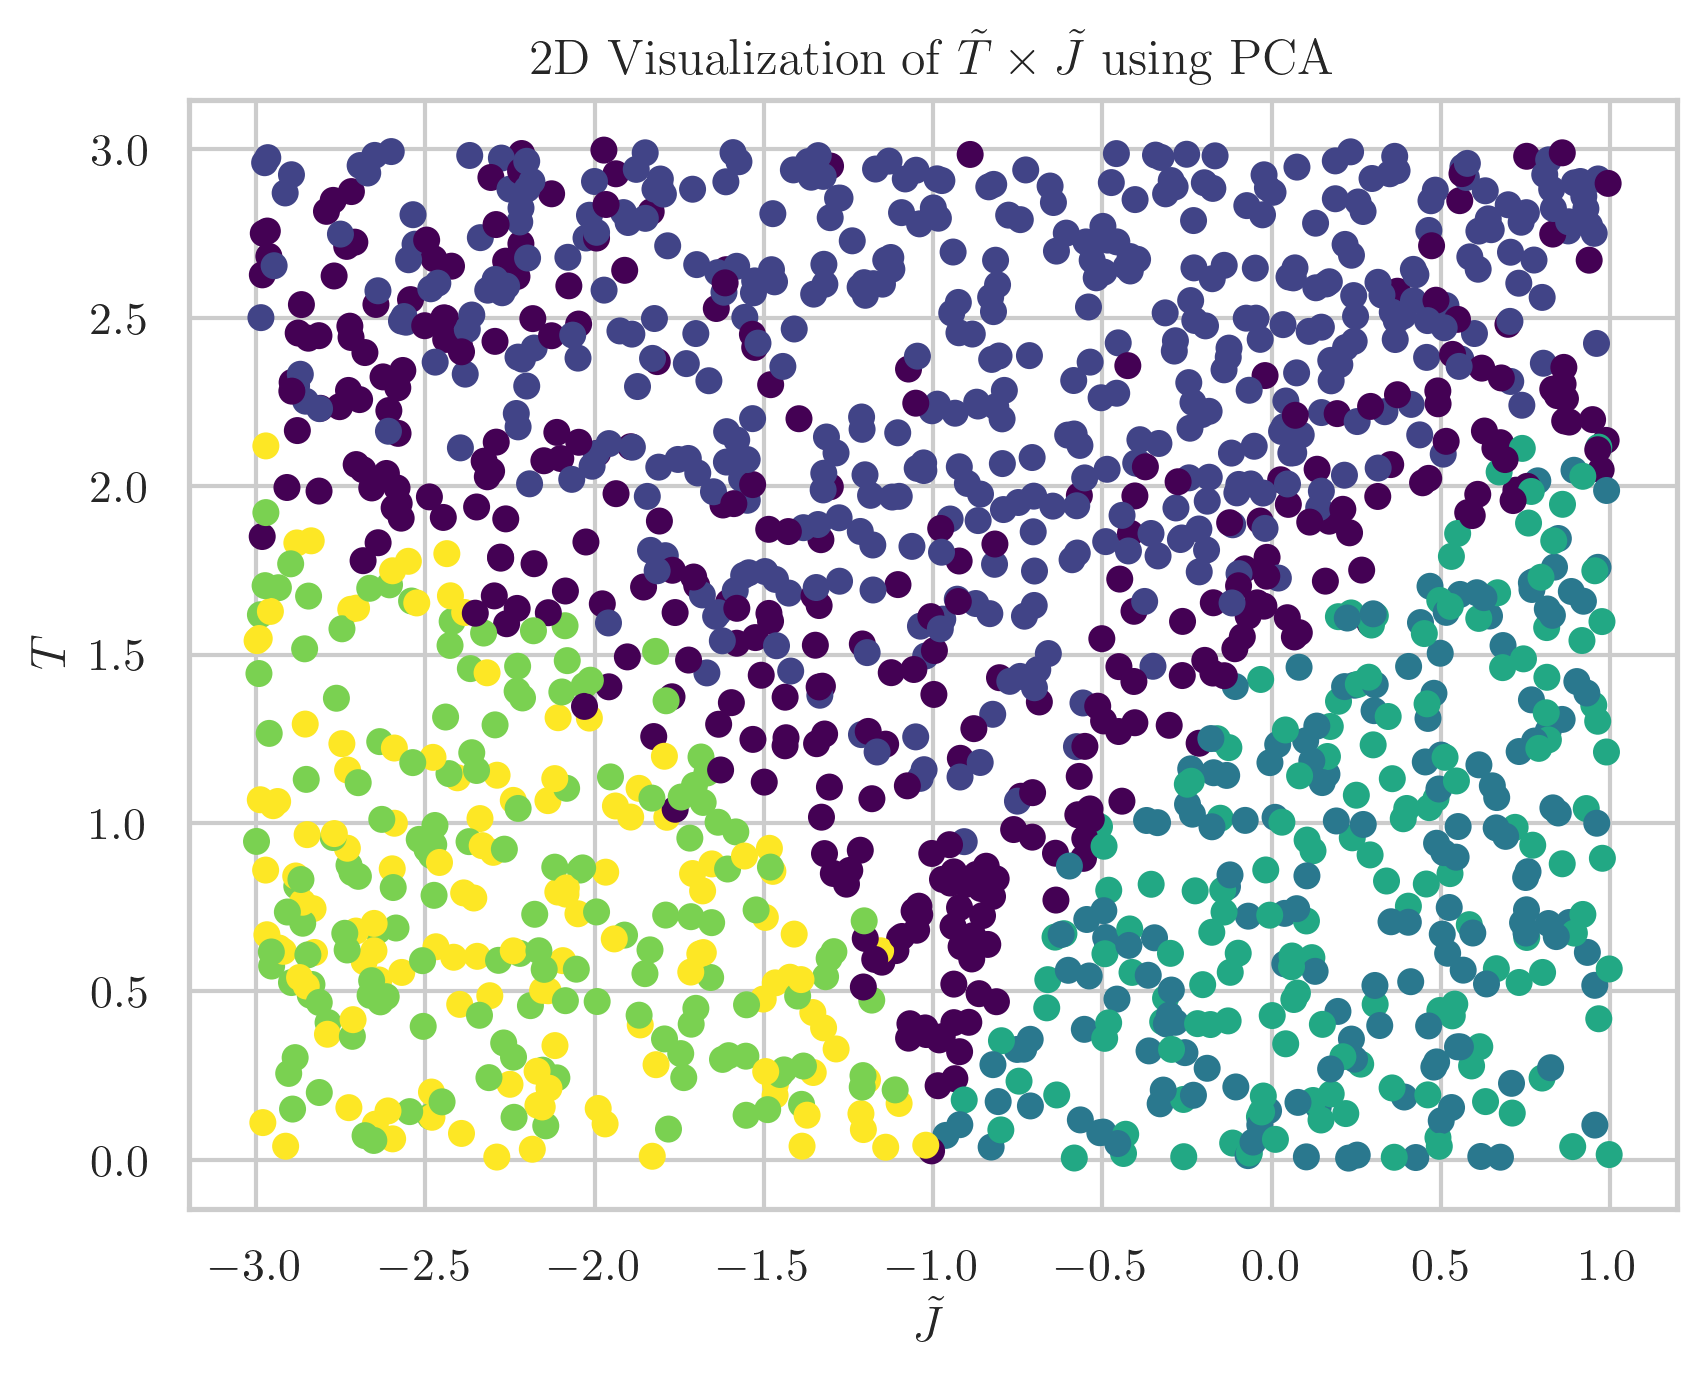

In [10]:
data_loader = torch.utils.data.DataLoader(trainset, batch_size=1400, shuffle=False)
configs = []
with torch.no_grad():
    # Get a batch of data
    configs, params = next(iter(data_loader))
    # images = images.numpy()
    configs = configs.numpy()
    params = params.cpu().numpy()
    

# # Apply t-SNE to reduce latent space to 2D, default perplexity = 30
# tsne = TSNE(n_components=2, random_state=42, perplexity=10)
# tSNE_2d = tsne.fit_transform(configs.reshape(configs.shape[0], -1))


pca = PCA(n_components=2)
pca_Raw = pca.fit_transform(configs.reshape(configs.shape[0], -1))

plt.scatter(pca_Raw[:, 0], pca_Raw[:, 1], s=10, c='black' ,label='PCA (Raw)')
plt.show()

neighbours = NearestNeighbors(n_neighbors=10)
neighbours_fit = neighbours.fit(pca_Raw)
distances,_ = neighbours_fit.kneighbors(pca_Raw)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]  # Exclude the first column (distance to itself)

plt.plot(distances, label='Nearest Neighbours Distance')
plt.title(r'Estimation of $\varepsilon$ for DBSCAN')
plt.xlabel('Ranked Distance')
plt.ylabel('Distance to Nearest Neighbour')
plt.annotate(r'$\varepsilon=1$', xy=(1350, 1), xytext=(1100, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=15)
# plt.xlim(1200, 1400)
# plt.ylim(0.5, 1.5)
plt.show()

epsilon = 1
min_samples = 20
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(pca_Raw)

scatter = plt.scatter(pca_Raw[:, 0], pca_Raw[:, 1], c=labels, cmap='viridis', s=10) # oldcmap='Set1'
plt.colorbar(scatter)
plt.title("PCA of configs + DBSCAN (samples="+str(min_samples)+")")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
# plt.legend()
plt.show()

#trainset with 5000 samples
plt.scatter(params[:, 0], params[:,1], c=labels, cmap='viridis', s=30)
# plt.colorbar(scatter, ticks=range(10), label='PCA of Latent Space')
plt.title(r'2D Visualization of $\tilde{T} \times \tilde{J}$ using PCA')
plt.xlabel(r'$\tilde{J}$')
plt.ylabel(r'$T$')
plt.show()

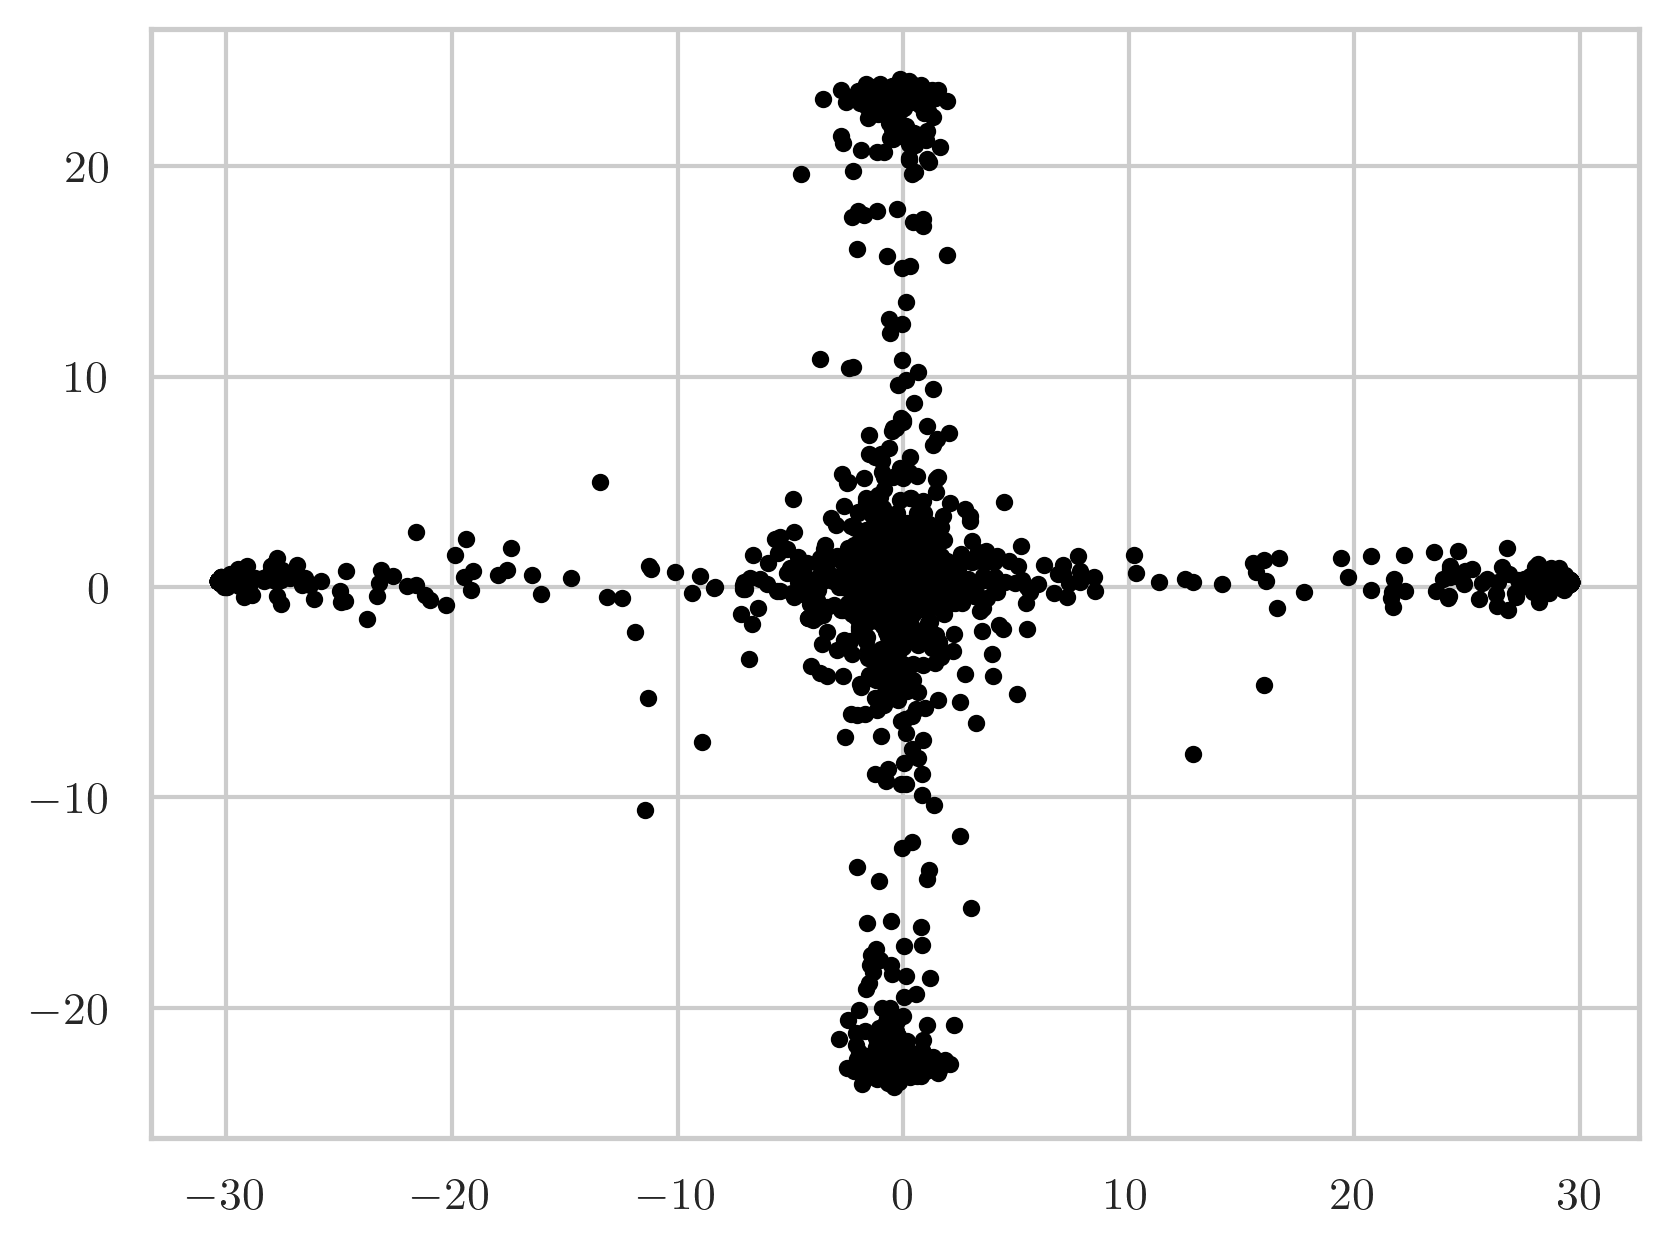

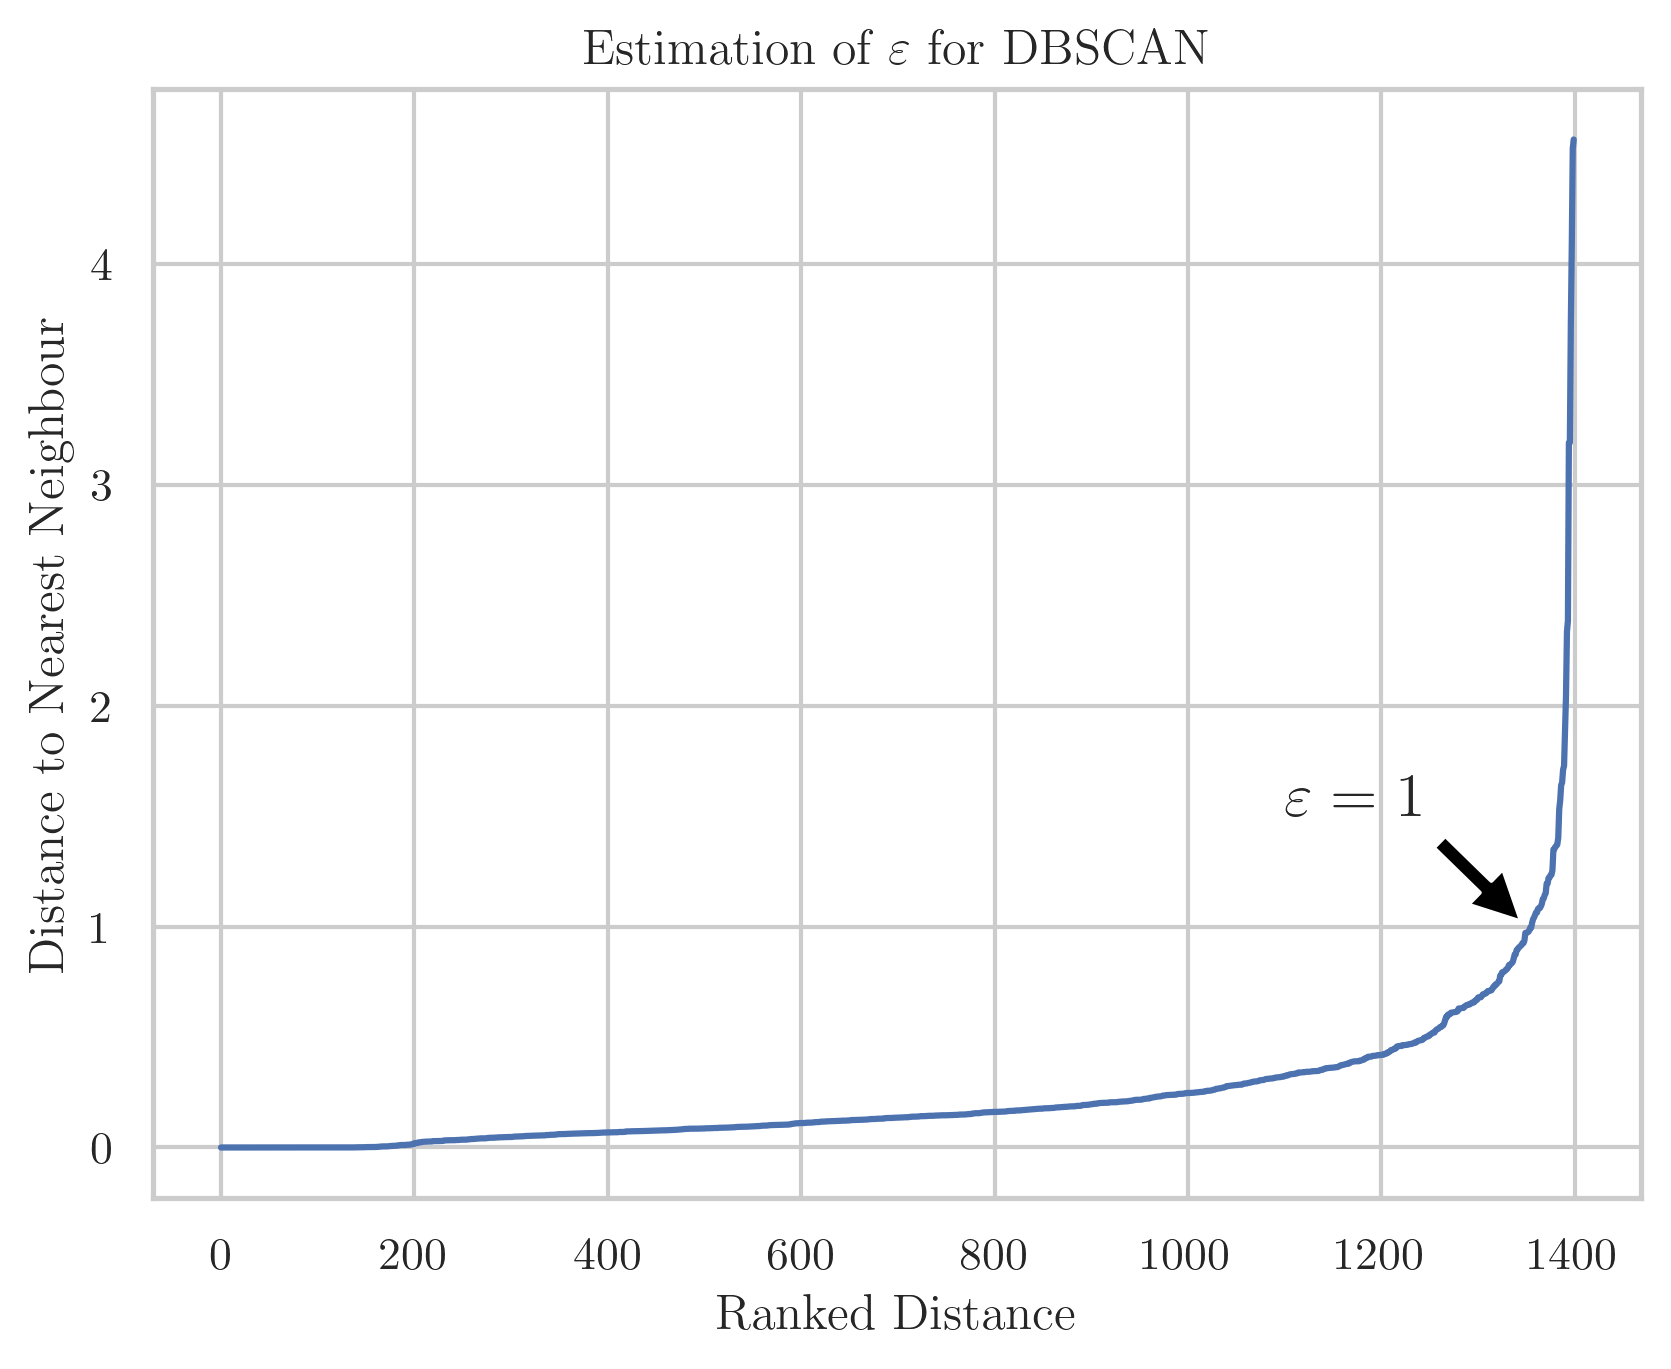

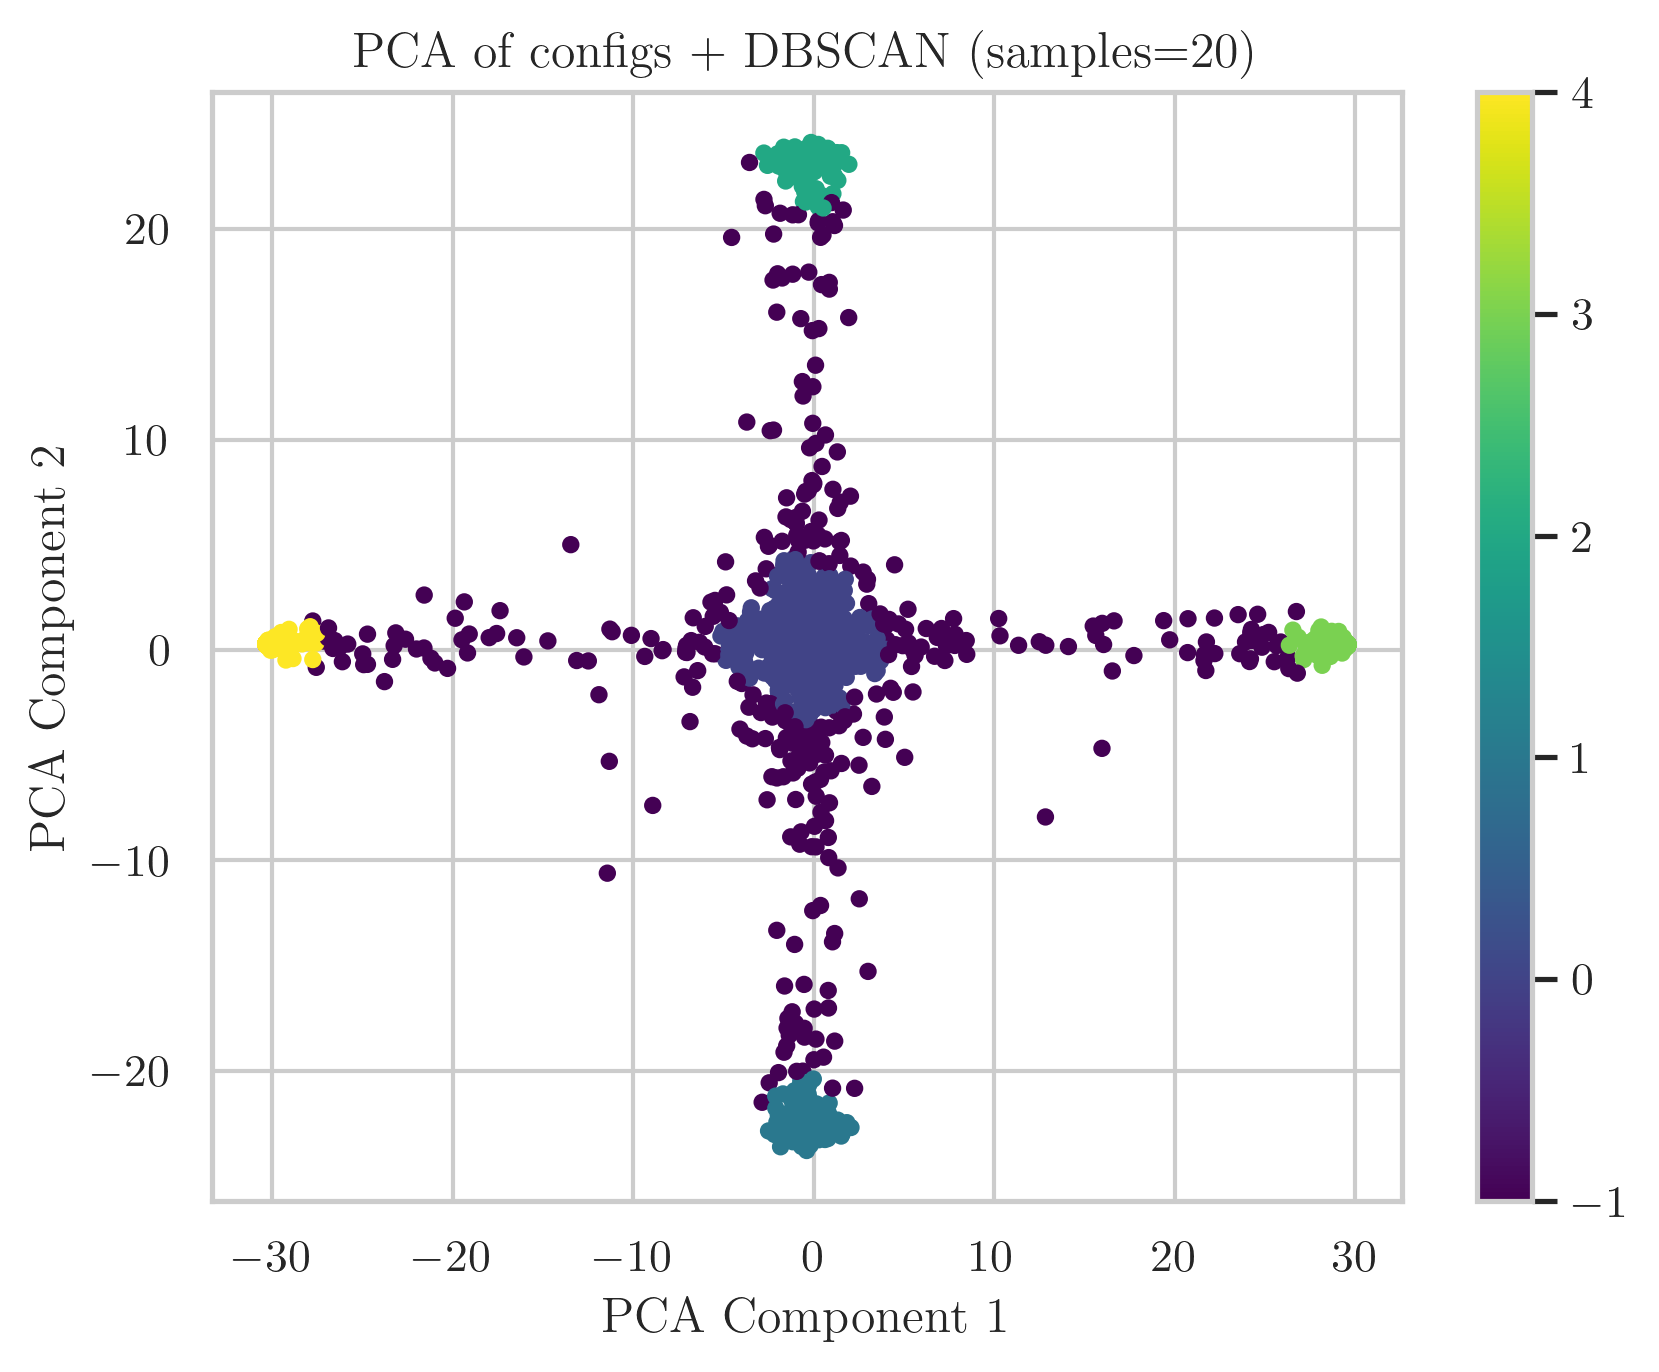

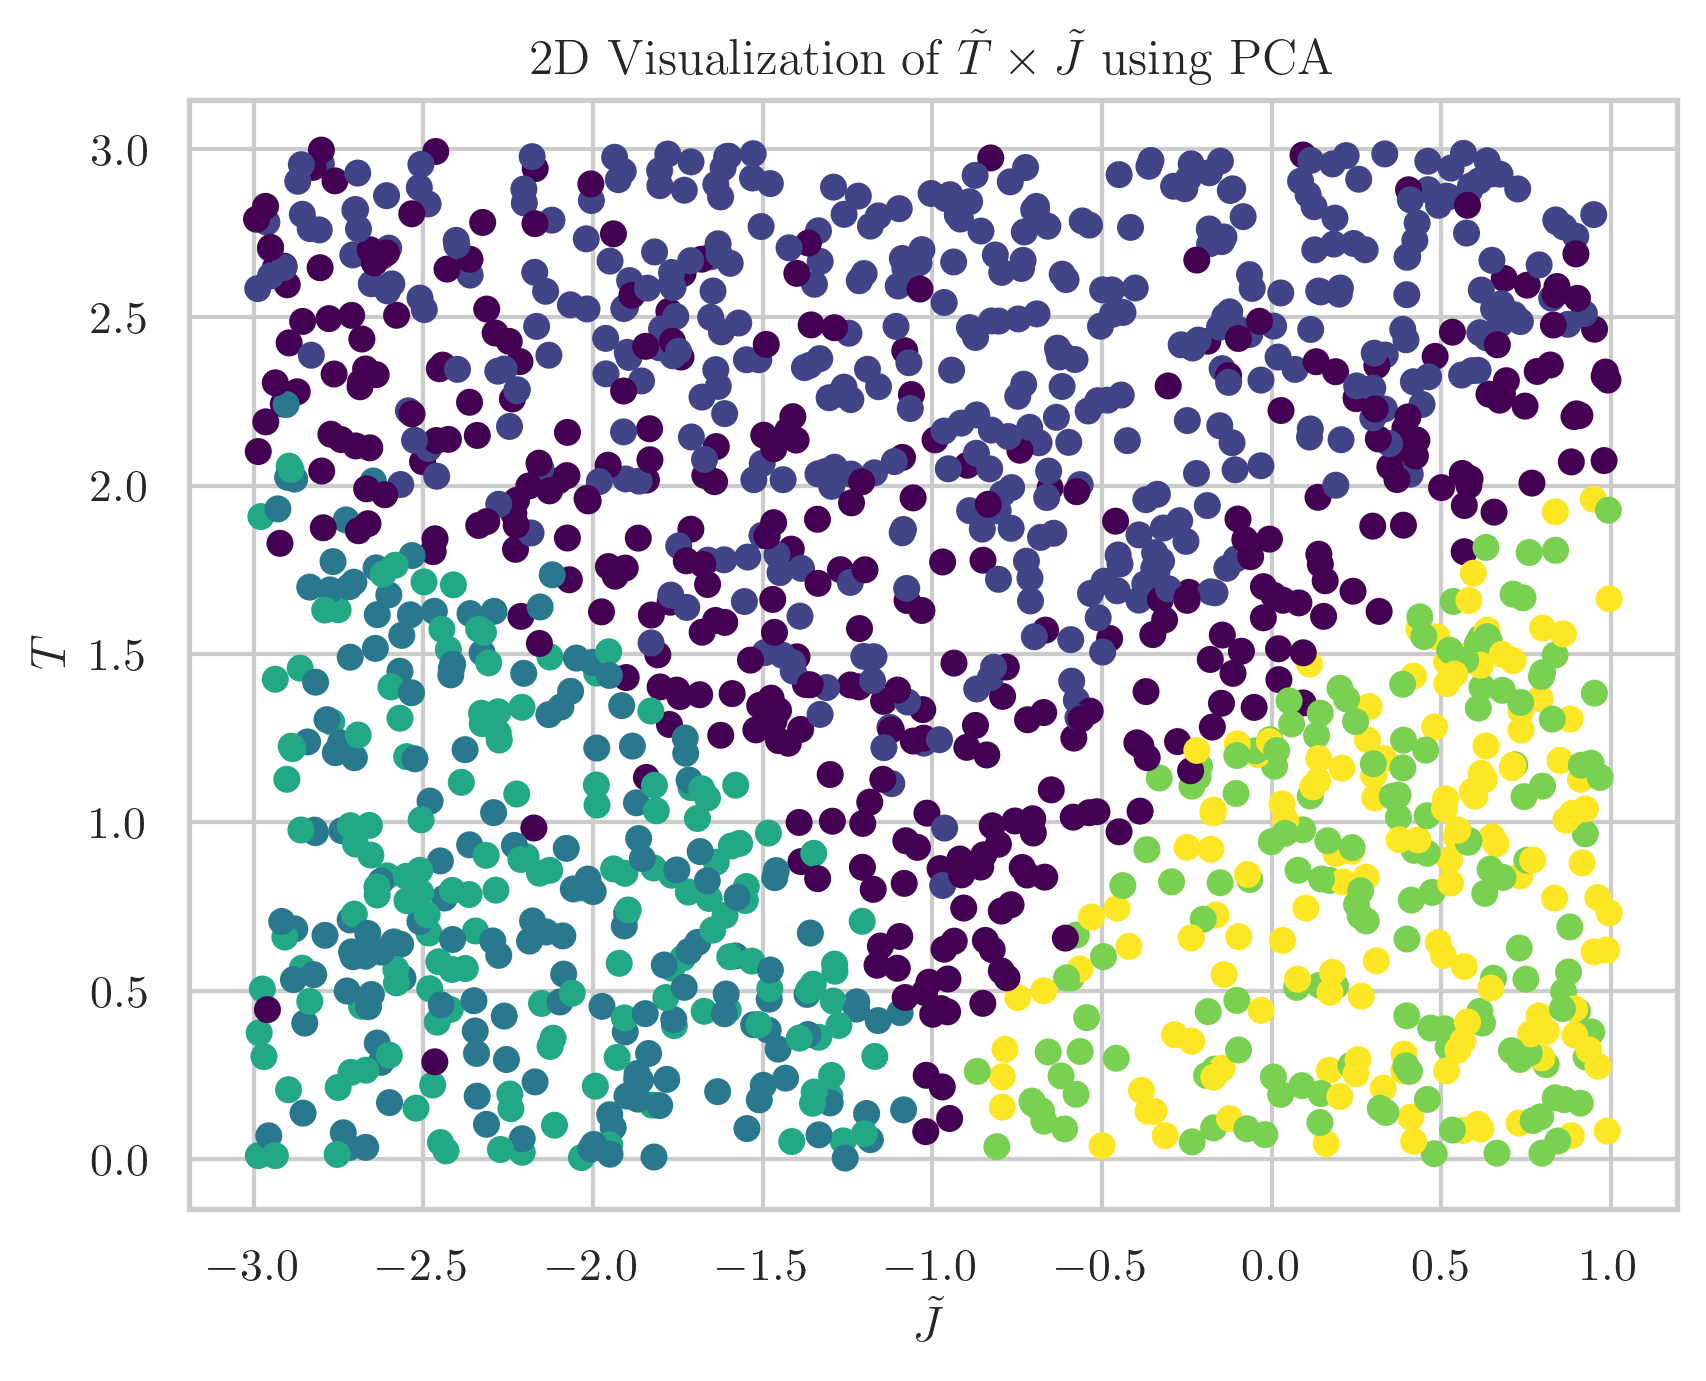

In [9]:
data_loader = torch.utils.data.DataLoader(smallset, batch_size=1400, shuffle=False)
configs = []
with torch.no_grad():
    # Get a batch of data
    configs, params = next(iter(data_loader))
    # images = images.numpy()
    configs = configs.numpy()
    params = params.cpu().numpy()
    

# # Apply t-SNE to reduce latent space to 2D, default perplexity = 30
# tsne = TSNE(n_components=2, random_state=42, perplexity=10)
# tSNE_2d = tsne.fit_transform(configs.reshape(configs.shape[0], -1))


pca = PCA(n_components=2)
pca_Raw = pca.fit_transform(configs.reshape(configs.shape[0], -1))

plt.scatter(pca_Raw[:, 0], pca_Raw[:, 1], s=10, c='black' ,label='PCA (Raw)')
plt.show()

neighbours = NearestNeighbors(n_neighbors=10)
neighbours_fit = neighbours.fit(pca_Raw)
distances,_ = neighbours_fit.kneighbors(pca_Raw)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]  # Exclude the first column (distance to itself)

plt.plot(distances, label='Nearest Neighbours Distance')
plt.title(r'Estimation of $\varepsilon$ for DBSCAN')
plt.xlabel('Ranked Distance')
plt.ylabel('Distance to Nearest Neighbour')
plt.annotate(r'$\varepsilon=1$', xy=(1350, 1), xytext=(1100, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=15)
# plt.xlim(1200, 1400)
# plt.ylim(0.5, 1.5)
plt.show()

epsilon = 1
min_samples = 20
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(pca_Raw)

scatter = plt.scatter(pca_Raw[:, 0], pca_Raw[:, 1], c=labels, cmap='viridis', s=10) # oldcmap='Set1'
plt.colorbar(scatter)
plt.title("PCA of configs + DBSCAN (samples="+str(min_samples)+")")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
# plt.legend()
plt.show()

#trainset with 5000 samples
plt.scatter(params[:, 0], params[:,1], c=labels, cmap='viridis', s=30)
# plt.colorbar(scatter, ticks=range(10), label='PCA of Latent Space')
plt.title(r'2D Visualization of $\tilde{T} \times \tilde{J}$ using PCA')
plt.xlabel(r'$\tilde{J}$')
plt.ylabel(r'$T$')
plt.show()